In [86]:
import pandas as pd

crimeDataframe = pd.read_csv("311_Customer_Service_Requests.csv")

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [87]:
crimeDataframe.head()

,SRRecordID,ServiceRequesNum,SRType,Agency,Neighborhood,StreetAddress,ZipCode,MethodReceived,SRStatus,CreatedDate,StatusDate,DueDate,LastActivity,Outcome,LastActivityDate,GeoLocation
0,1094344940,15-00072082,WW Water Leak (Exterior),Bureau of Water and Waste Water,CANTON,1013 S CLINTON ST,21224,Interface,CLOSED,02/01/2015 08:12:00 AM +0000,02/01/2015 06:23:00 PM +0000,02/03/2015 08:12:00 AM +0000,Cityworks SR Comments,UPDATED,NaN,NaN
1,1094344982,15-00072083,BCLB-Liquor License Complaint,Liquor License Board,GREEKTOWN,500 S LEHIGH ST,21224,Interface,CLOSED,02/01/2015 08:48:00 AM +0000,02/18/2015 09:12:00 PM +0000,03/21/2015 07:48:00 AM +0000,Dispatch Investigator,Closed,NaN,NaN
2,1094345013,15-00072084,WW Hydrant Open,Bureau of Water and Waste Water,MILLHILL,2600 WILKENS AVE,21223,Phone,HOLDLOCK,02/01/2015 09:13:00 AM +0000,02/01/2015 11:07:00 AM +0000,02/02/2015 09:13:00 AM +0000,Cityworks SR Comments,UPDATED,NaN,NaN
3,1094345094,15-00072085,TRM-Snow/Icy Conditions,Department of Transportation,MEDFIELD,4496 83 N,21209,Phone,CLOSED,02/01/2015 09:24:00 AM +0000,02/04/2015 10:41:00 PM +0000,02/02/2015 09:24:00 AM +0000,Cityworks SR Comments,UPDATED,NaN,NaN
4,1094345124,15-00072086,TRM-Snow/Icy Conditions,Department of Transportation,EAST BALTIMORE MIDWAY,732 BARTLETT AVE,21218,Phone,CLOSED,02/01/2015 09:29:00 AM +0000,02/03/2015 09:09:00 PM +0000,02/02/2015 09:29:00 AM +0000,Cityworks SR Comments,UPDATED,NaN,NaN


In [88]:
crimeDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094635 entries, 0 to 2094634
Data columns (total 16 columns):
SRRecordID          int64
ServiceRequesNum    object
SRType              object
Agency              object
Neighborhood        object
StreetAddress       object
ZipCode             object
MethodReceived      object
SRStatus            object
CreatedDate         object
StatusDate          object
DueDate             object
LastActivity        object
Outcome             object
LastActivityDate    object
GeoLocation         object
dtypes: int64(1), object(15)
memory usage: 255.7+ MB


In [89]:
import numpy as np

crimeDataframe["Neighborhood"]=crimeDataframe.Neighborhood.astype(str).copy()
crimeDataframe["SRType"]=crimeDataframe.SRType.astype(str).copy()
crimeDataframe["CreatedMonth"]=crimeDataframe.CreatedDate.astype(str).apply(lambda x:x.split("/")[0]).copy()
crimeDataframe["CreatedYear"]=crimeDataframe.CreatedDate.astype(str).apply(lambda x:x.split("/")[2].split(" ")[0]).copy()
crimeDataframe=crimeDataframe.filter(items=["Neighborhood","SRType","CreatedMonth","CreatedYear"])
crimeDataframe.info()
crimeDataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094635 entries, 0 to 2094634
Data columns (total 4 columns):
Neighborhood    object
SRType          object
CreatedMonth    object
CreatedYear     object
dtypes: object(4)
memory usage: 63.9+ MB


,Neighborhood,SRType,CreatedMonth,CreatedYear
0,CANTON,WW Water Leak (Exterior),02,2015
1,GREEKTOWN,BCLB-Liquor License Complaint,02,2015
2,MILLHILL,WW Hydrant Open,02,2015
3,MEDFIELD,TRM-Snow/Icy Conditions,02,2015
4,EAST BALTIMORE MIDWAY,TRM-Snow/Icy Conditions,02,2015


In [90]:
import numpy as np

table=crimeDataframe["Neighborhood"].value_counts()
table2=crimeDataframe["SRType"].value_counts()
print(np.count_nonzero(table))
print(np.count_nonzero(table2))
#print(crimeDataframe.info())
print(table[:10])
print(table2[:10])
crimeDataframe.columns

271
396
BELAIR-EDISON                      57761
CANTON                             47296
BROADWAY EAST                      40118
SANDTOWN-WINCHESTER                36940
COLDSTREAM HOMESTEAD MONTEBELLO    36600
BROOKLYN                           31176
FRANKFORD                          29936
WASHINGTON VILLAGE                 28110
DOWNTOWN                           27827
CENTRAL PARK HEIGHTS               27811
Name: Neighborhood, dtype: int64
SW-Rat Rubout - Proactive      355394
SW-Bulk-Scheduled              179771
HCD-Sanitation Property        156027
TRS-Parking Complaints          79689
SW-Dirty Alley                  78310
ECC-Vehicle Look Up             62329
SW-HGW                          58687
SW-Dirty Street                 49523
SW-Dirty Street - Proactive     45065
BGE-StLight(s) Out              39681
Name: SRType, dtype: int64


Index(['Neighborhood', 'SRType', 'CreatedMonth', 'CreatedYear'], dtype='object')

In [91]:
requiredSRTypes=["TRS-Parking Complaints"]#,"TRS-Parking Complaints","SW-Dirty Alley","ECC-Vehicle Look Up","SW-HGW","SW-Dirty Street","SW-Dirty Street - Proactive","BGE-StLight(s) Out"]
requiredNeighborhood=["BELAIR-EDISON"]
requiredYears=["2014","2015","2016","2017"]
crimeDataframe=crimeDataframe[crimeDataframe["Neighborhood"].isin(requiredNeighborhood)].copy()
crimeDataframe=crimeDataframe[crimeDataframe["SRType"].isin(requiredSRTypes)].copy()
crimeDataframe=crimeDataframe[crimeDataframe["CreatedYear"].isin(requiredYears)].copy()
print(crimeDataframe.columns)
crimeDataframefiltered=crimeDataframe.groupby(["SRType","CreatedMonth","CreatedYear","Neighborhood"]).agg({"SRType":'count'})
print(crimeDataframefiltered.columns)
crimeDataframefiltered=crimeDataframefiltered.add_suffix("_Count").reset_index()
print(crimeDataframefiltered.columns)
crimeDataframefiltered.sort_values(by=["CreatedYear","CreatedMonth"],inplace=True)
crimeDataframefiltered

Index(['Neighborhood', 'SRType', 'CreatedMonth', 'CreatedYear'], dtype='object')
Index(['SRType'], dtype='object')
Index(['SRType', 'CreatedMonth', 'CreatedYear', 'Neighborhood',
       'SRType_Count'],
      dtype='object')


,SRType,CreatedMonth,CreatedYear,Neighborhood,SRType_Count
2,TRS-Parking Complaints,02,2015,BELAIR-EDISON,18
5,TRS-Parking Complaints,03,2015,BELAIR-EDISON,30
8,TRS-Parking Complaints,04,2015,BELAIR-EDISON,30
11,TRS-Parking Complaints,05,2015,BELAIR-EDISON,15
14,TRS-Parking Complaints,06,2015,BELAIR-EDISON,31
17,TRS-Parking Complaints,07,2015,BELAIR-EDISON,22
20,TRS-Parking Complaints,08,2015,BELAIR-EDISON,26
23,TRS-Parking Complaints,09,2015,BELAIR-EDISON,25
26,TRS-Parking Complaints,10,2015,BELAIR-EDISON,18
29,TRS-Parking Complaints,11,2015,BELAIR-EDISON,17


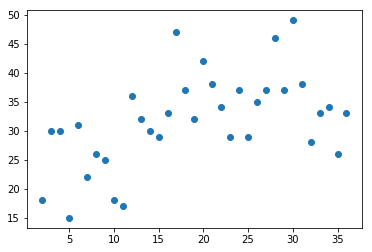

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(((crimeDataframefiltered["CreatedYear"].astype(float)-2015)*12)+crimeDataframefiltered["CreatedMonth"].astype(float),crimeDataframefiltered["SRType_Count"])

In [93]:
print(len(crimeDataframefiltered))
crimeDataframefiltered.shape

35


(35, 5)

In [94]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import LabelEncoder
class MultiColLabelEncoder(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,y=None):
        return self
    def transform(self,X):
        for attr in list(X):
            X[attr]=LabelEncoder().fit_transform(X[attr])
        return X.values

In [95]:
from sklearn.base import BaseEstimator,TransformerMixin
class DataframeSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names,retain=False):
        self.attribute_names=attribute_names
        self.retain=retain
    def fit(self,a=None):
        return self
    def transform(self,dataframe):
        if(self.retain):
            return dataframe[self.attribute_names]
        else:
            return dataframe[self.attribute_names].values

In [96]:
rel_num_attrib=[]
cat_attrib=["CreatedMonth","CreatedYear"]
nonnum_cat_attrib=["Neighborhood"]

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import CategoricalEncoder
from sklearn.preprocessing import LabelEncoder

num_pipeline=Pipeline([("selector",DataframeSelector(rel_num_attrib)),
                                ("imputer",Imputer(strategy="median")),
                               ("scaler",StandardScaler()),
                               ])
cat_pipeline=Pipeline([("selector",DataframeSelector(cat_attrib)),
                       ("imputer",Imputer(strategy="most_frequent")),
                        ("encoder",CategoricalEncoder(encoding="onehot-dense"))])

nonum_cat_pipeline=Pipeline([("selector",DataframeSelector(nonnum_cat_attrib,retain=True)),
                       ("multicolencoder",MultiColLabelEncoder()),
                       ("imputer",Imputer(strategy="most_frequent")),
                        ("encoder",CategoricalEncoder(encoding="onehot-dense"))])

full_pipeline=FeatureUnion(transformer_list=[#("num_pipeline",num_pipeline),
                                             ("cat_pipeline",cat_pipeline),
                                              ("nonum_cat_pipeline",nonum_cat_pipeline)])

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [98]:
crimeDataframefiltered_prepared=full_pipeline.fit_transform(crimeDataframefiltered)
print(crimeDataframefiltered_prepared.shape)
crimeDataframefiltered_target=crimeDataframefiltered["SRType_Count"].reshape(-1,1)
print(np.max(crimeDataframefiltered_target))

(35, 16)
49


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:

#Machine learning Models libraries
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

#Scoring and Validating Model
from sklearn.model_selection import cross_val_score

#Initializing ML models
sgd_clf=SGDRegressor(random_state=42)
rf_clf=RandomForestRegressor(random_state=42)
gb_clf=GradientBoostingRegressor(random_state=42)
knn_clf=KNeighborsRegressor()
sv_clf=SVR()
lsv_clf=LinearSVR()

print("\n SGD classifier results:")
cross_val_results=cross_val_score(sgd_clf,crimeDataframefiltered_prepared,crimeDataframefiltered_target,cv=5,scoring="neg_mean_squared_error")
print(np.sqrt(np.absolute(cross_val_results)))
print(np.mean(np.sqrt(np.absolute(cross_val_results))))
print(np.std(np.sqrt(np.absolute(cross_val_results))))

print("\n  RF results:")
cross_val_results=cross_val_score(rf_clf,crimeDataframefiltered_prepared,crimeDataframefiltered_target,cv=5,scoring="neg_mean_squared_error")
print(np.sqrt(np.absolute(cross_val_results)))
print(np.mean(np.sqrt(np.absolute(cross_val_results))))
print(np.std(np.sqrt(np.absolute(cross_val_results))))

print("\n GB results:")
cross_val_results=cross_val_score(gb_clf,crimeDataframefiltered_prepared,crimeDataframefiltered_target,cv=5,scoring="neg_mean_squared_error")
print(np.sqrt(np.absolute(cross_val_results)))
print(np.mean(np.sqrt(np.absolute(cross_val_results))))
print(np.std(np.sqrt(np.absolute(cross_val_results))))

print("\n knn results:")
cross_val_results=cross_val_score(knn_clf,crimeDataframefiltered_prepared,crimeDataframefiltered_target,cv=5,scoring="neg_mean_squared_error")
print(np.sqrt(np.absolute(cross_val_results)))
print(np.mean(np.sqrt(np.absolute(cross_val_results))))
print(np.std(np.sqrt(np.absolute(cross_val_results))))

print("\n SVR results:")
cross_val_results=cross_val_score(sv_clf,crimeDataframefiltered_prepared,crimeDataframefiltered_target,cv=5,scoring="neg_mean_squared_error")
print(np.sqrt(np.absolute(cross_val_results)))
print(np.mean(np.sqrt(np.absolute(cross_val_results))))
print(np.std(np.sqrt(np.absolute(cross_val_results))))

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:131: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:670: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:131: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will b


 SGD classifier results:
[ 6.65424151  7.16663389 17.55665739 14.4204809  14.64608034]
12.088818804018683
4.373466092217215

  RF results:
[ 9.05830322  6.69776082 10.14009017  6.43428318  7.62673868]
7.9914352111293026
1.413240595443142

 GB results:
[ 7.47190685  6.99012364 10.63334603  6.2961974   7.58747832]
7.795810449392482
1.4898251262129143

 knn results:
[ 6.70095942  6.8535705  10.37854931  5.29096265  6.9701404 ]
7.238836453195124
1.682970487274303

 SVR results:
[10.4594484   8.56322582  8.77557159  6.68689744  7.38761207]
8.374551063282379
1.2934787097412836


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:670: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:194: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:670: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:194: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better 

In [100]:
from sklearn.metrics import mean_squared_error

knn_clf.fit(crimeDataframefiltered_prepared,np.log(crimeDataframefiltered_target))
predictions=knn_clf.predict(crimeDataframefiltered_prepared)
np.sqrt(mean_squared_error(np.log(crimeDataframefiltered_target),predictions))


0.2149722194184497

In [101]:
print(np.min(np.log(crimeDataframefiltered_target)))
print(np.mean(np.log(crimeDataframefiltered_target)))
print(np.max(np.log(crimeDataframefiltered_target)))

2.70805020110221
3.4245570053893153
3.8918202981106265


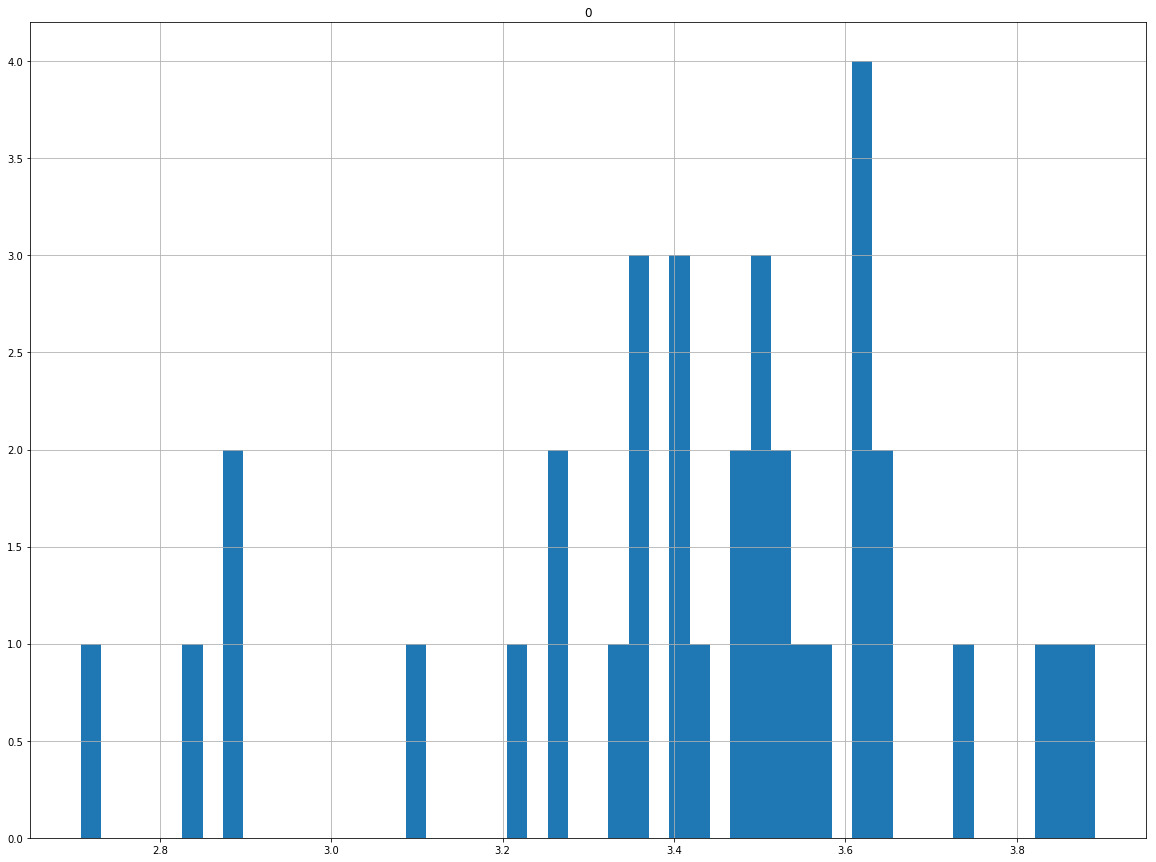

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
#Used to plot the histogram of the dataframe numerical features to know the overall distribution.
#This can also show whether if there was any scaling/normalization done on the features on close observation.
pd.DataFrame(np.log(crimeDataframefiltered_target)).hist(bins=50,figsize=(20,15))
plt.show()

In [103]:
import tensorflow as tf

tf.reset_default_graph()

n_steps=12
n_inputs=1
n_outputs=1
n_neurons=100
learning_rate=0.001

x=tf.placeholder(tf.float32,shape=(None,n_steps,n_inputs),name="X")
y=tf.placeholder(tf.float32,shape=(None,n_steps,n_outputs),name="Y")

basic_cell=tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,activation=tf.nn.elu),output_size=n_outputs)

outputs,states=tf.nn.dynamic_rnn(basic_cell,x,dtype=tf.float32)

loss=tf.reduce_mean(tf.square(outputs-y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op=optimizer.minimize(loss)

init=tf.global_variables_initializer()

saver=tf.train.Saver()

In [104]:
def next_batch(iteration,size):
    index=iteration%23
    index2=index+1
    return [crimeDataframefiltered_target[index:index+size]],[crimeDataframefiltered_target[index2:index2+size]]
crimeDataframefiltered_target[23:35]

array([[29],
       [35],
       [37],
       [46],
       [37],
       [49],
       [38],
       [28],
       [33],
       [34],
       [26],
       [33]])

In [105]:
n_iterations=15000

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        x_batch,y_batch=next_batch(iteration,n_steps)
        sess.run([training_op],feed_dict={x:x_batch,y:y_batch})
        if(iteration%1000==0):
            mse_val=sess.run(tf.sqrt(loss),feed_dict={x:[crimeDataframefiltered_target[22:34]],y:[crimeDataframefiltered_target[23:35]]})
            print(mse_val)
    y_pred=sess.run(outputs,feed_dict={x:[crimeDataframefiltered_target[22:34]]})
    print(y_pred)

32.267635
5.364125
3.3471308
3.3448527
3.3920221
3.1414182
2.4447596
2.579108
2.157671
2.1245887
1.908149
3.116813
1.9696622
1.9700845
1.96462
[[[33.250023]
  [32.172115]
  [35.020573]
  [45.593155]
  [36.033268]
  [50.029404]
  [38.755646]
  [28.217258]
  [32.89314 ]
  [34.248577]
  [25.71324 ]
  [32.585033]]]


In [ ]:
#[crimeDataframefiltered_target[batch_index:batch_index+12]],
    #y:[crimeDataframefiltered_target[batch_index+1:(batch_index+13)]]})